In [1]:
# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Qn1 importing the csv file and assigning to DataFrame

In [4]:
data = pd.read_csv('employee.csv')

In [5]:
# Identifying Basic details of data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [7]:
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [8]:
# Data is having 7 non null columns but columns age,income and gender has non numerical values.
# Data is having 3 numerical columns and 4 string columns
# there are total 9 rows in the data

In [9]:
# Qn2 Changing the index to column name

In [10]:
data.set_index('name',inplace=True)

In [11]:
data.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [12]:
# index has been replaced with name column

In [13]:
# Qn3 Select rows for specific names Jack Morgan and Josh wills

In [14]:
data.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


In [15]:
# Qn4 Select data for multiple values "Sales" and “Finance”

In [16]:
data[data['department'].isin(['Finance','Sales'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [17]:
# Qn5 Display employee who has more than 700 performance score

In [18]:
data[data['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [19]:
# Qn6 Display employee who has more than 500 and less than 700 performance score

In [20]:
data[(data['performance_score']>500) & (data['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


In [21]:
# Qn7 Check and handle missing values in the data set

In [22]:
# finding which observations have missing values

In [23]:
data[data.isna().any(axis=1)]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53


In [24]:
data.describe(include='all')

,age,income,gender,department,grade,performance_score
count,7.000000,7.000000,7,9,9,9.000000
unique,NaN,NaN,2,3,4,NaN
top,NaN,NaN,F,Operations,G3,NaN
freq,NaN,NaN,5,3,5,NaN
mean,40.428571,52857.142857,NaN,NaN,NaN,610.666667
std,12.204605,26028.372797,NaN,NaN,NaN,235.671912
min,23.000000,16000.000000,NaN,NaN,NaN,53.000000
25%,31.000000,38500.000000,NaN,NaN,NaN,556.000000
50%,45.000000,52000.000000,NaN,NaN,NaN,674.000000
75%,49.500000,63500.000000,NaN,NaN,NaN,711.000000


In [25]:
# For categorical Variable gender mode is F and frequencey is 5 out of 9 observations
# for numerical Variable mean and median are respectively for age - 40.42,45 for incom - 52857.14,52000
# we need to check the distribution of data

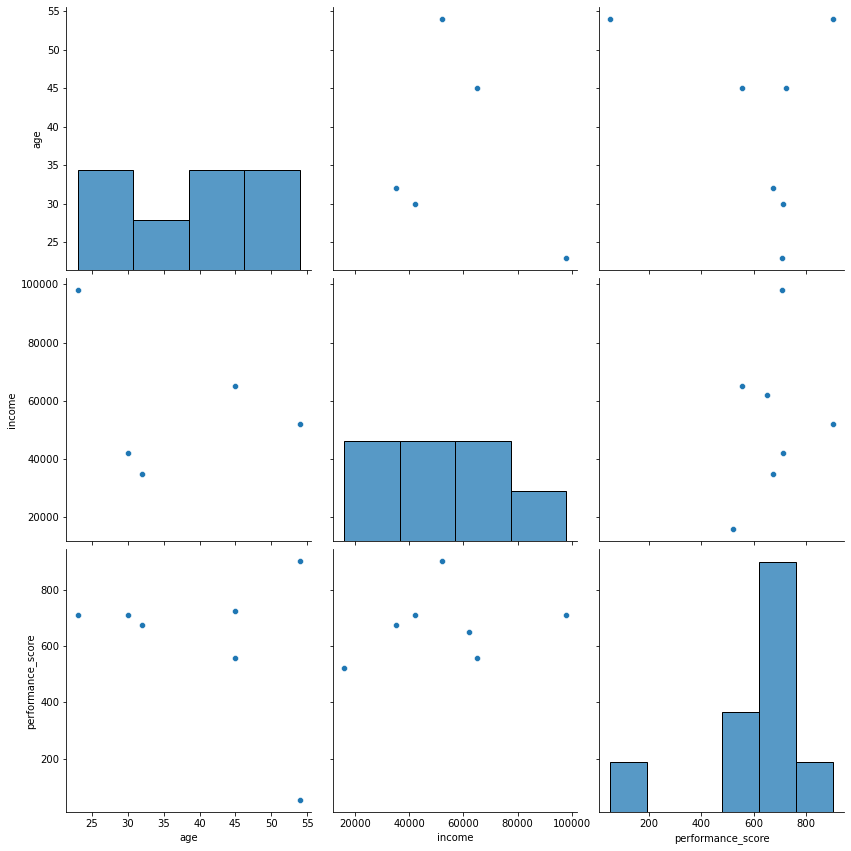

In [26]:
graph= data.select_dtypes(include=[float,int])
sns.pairplot(data=graph,height=4)
plt.show()

In [27]:
# Since there is no uniform distribution we will consider median to replace missing values in age and income
# For categorical Variable gender mode is F and frequencey is 5 out of 9 observations. so we will replace missing
# values in Gender with F

In [28]:
# replacing missing values in column age and income with median value

In [29]:
data1=data
for i in ['age','income']:
    data1[i]=data1[i].fillna(data1[i].median())

In [30]:
data1

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,NaN,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,NaN,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [31]:
#Checking for NaN Values

In [32]:
data[data.isna().any(axis=1)]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,NaN,Operations,G3,723
Satyam Sharma,45.0,62000.0,NaN,Sales,G3,649


In [33]:
# missing values in age and income column has been replaced with median value and only gender has NaN values

In [34]:
# replacing missing values in Gender with mode F

In [35]:
data1['gender'].mode()

0    F
dtype: object

In [36]:
data1['gender']=data1['gender'].fillna(data1['gender'].mode()[0])

In [37]:
# Checking again for missing values

In [38]:
data[data.isna().any(axis=1)]

,age,income,gender,department,grade,performance_score
name,,,,,,


In [39]:
data1

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [40]:
# all missing values in the dataset has been handled

In [41]:
# Qn 8  Check the outliers and handle outliers in performance score using Percentiles.

In [42]:
# Check outliers using boxlot for age

<AxesSubplot:>

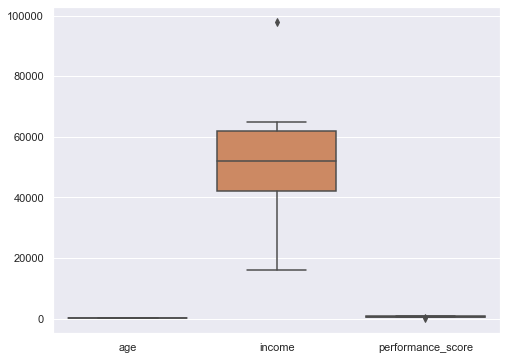

In [43]:
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(data=data1)

[Text(0.5, 0, 'performance_score')]

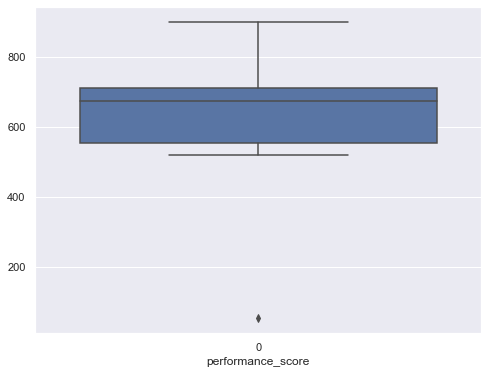

In [44]:
bplot=sns.boxplot(data=data1['performance_score'])
bplot.set(xlabel='performance_score')

In [45]:
# As per the above 2 boxplots we can see there are outliers in column income and performance

In [46]:
# handling outlier in income column
# finding upper limit ,lower limit and IQR

In [47]:
Q1=np.percentile(data1['income'],25)
Q3=np.percentile(data1['income'],75)
IQR=Q3-Q1
LL=Q1-(1.5*IQR)
UL=Q3+(1.5*IQR)
print('Quartile 1:',Q1)
print('Quartile 3:',Q3)
print('Inter Quartile Range(IQR):',IQR)
print('Lower Limit:',LL)
print('Upper Limit:',UL)

Quartile 1: 42000.0
Quartile 3: 62000.0
Inter Quartile Range(IQR): 20000.0
Lower Limit: 12000.0
Upper Limit: 92000.0


In [48]:
# Outlier Data

In [49]:
data1[(data1['income']<LL) | (data1['income']>UL)]

,age,income,gender,department,grade,performance_score
name,,,,,,
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [50]:
# Leo Duck is having and income of 98000 which is greater than upper limit set
# Since the data set is very small deleting an observation will affect the study and 98000 is not too big in sales
# we will bring the outlier data point to upper limit value

In [51]:
index=data1.loc[(data1['income']<LL) | (data1['income']>UL)].index
index

Index(['Leo Duck'], dtype='object', name='name')

In [52]:
#data1['income'][index]=UL
data1.loc[index,'income']=UL

In [53]:
data1

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,92000.0,M,Sales,G4,709


[Text(0.5, 0, 'income')]

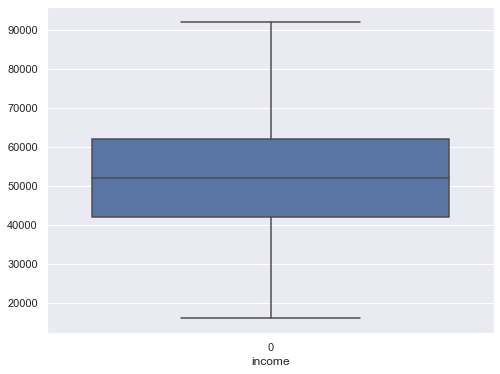

In [54]:
# again Checking outlier for income using boxplot
bplot=sns.boxplot(data=data1['income'])
bplot.set(xlabel='income')

In [55]:
# So no outlier is present in income column

In [56]:
# handling outlier in performance_score column
# finding upper limit ,lower limit and IQR

In [57]:
Q1=np.percentile(data1['performance_score'],25)
Q3=np.percentile(data1['performance_score'],75)
IQR=Q3-Q1
LL=Q1-(1.5*IQR)
UL=Q3+(1.5*IQR)
print('Quartile 1:',Q1)
print('Quartile 3:',Q3)
print('Inter Quartile Range(IQR):',IQR)
print('Lower Limit:',LL)
print('Upper Limit:',UL)

Quartile 1: 556.0
Quartile 3: 711.0
Inter Quartile Range(IQR): 155.0
Lower Limit: 323.5
Upper Limit: 943.5


In [58]:
# Outlier Data

In [59]:
data1[(data1['performance_score']<LL) | (data1['performance_score']>UL)]

,age,income,gender,department,grade,performance_score
name,,,,,,
James Authur,54.0,52000.0,F,Operations,G3,53


In [60]:
# Leo Duck is having a performance_score of 53 which is less than lower limit set
# Since the data set is very small deleting an observation will affect the study and 53 seems an error in data input
# we will bring the outlier data point to  lower limit so as not to delete the data point as dataset is very small

In [61]:
index=data1.loc[(data1['performance_score']<LL) | (data1['performance_score']>UL)].index
index

Index(['James Authur'], dtype='object', name='name')

In [62]:
data1.loc[index,'performance_score']=LL

In [63]:
data1

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723.0
S Kumar,45.0,16000.0,F,Finance,G0,520.0
Jack Morgan,32.0,35000.0,M,Finance,G2,674.0
Ying Chin,45.0,65000.0,F,Sales,G3,556.0
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711.0
Satyam Sharma,45.0,62000.0,F,Sales,G3,649.0
James Authur,54.0,52000.0,F,Operations,G3,323.5
Josh Wills,54.0,52000.0,F,Finance,G3,901.0
Leo Duck,23.0,92000.0,M,Sales,G4,709.0


[Text(0.5, 0, 'performance_score')]

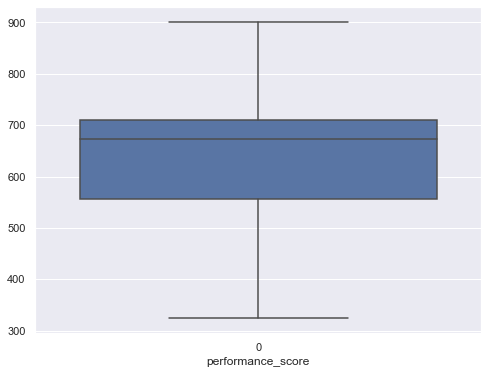

In [64]:
# again Checking outlier for performance_score using boxplot
bplot=sns.boxplot(data=data1['performance_score'])
bplot.set(xlabel='performance_score')

In [65]:
# So no outlier is present in performance_score column

In [66]:
# Qn 9  Check the gender column and do Dummy encoding.

In [67]:
data1.gender.nunique()

2

In [68]:
# there are 2 distinct values only F and M. Dummy encoding the values

In [69]:
data1_dummy=data1

In [70]:
data1_dummy=pd.get_dummies(data1_dummy,columns=['gender'])

In [71]:
data1_dummy

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723.0,1,0
S Kumar,45.0,16000.0,Finance,G0,520.0,1,0
Jack Morgan,32.0,35000.0,Finance,G2,674.0,0,1
Ying Chin,45.0,65000.0,Sales,G3,556.0,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711.0,1,0
Satyam Sharma,45.0,62000.0,Sales,G3,649.0,1,0
James Authur,54.0,52000.0,Operations,G3,323.5,1,0
Josh Wills,54.0,52000.0,Finance,G3,901.0,1,0
Leo Duck,23.0,92000.0,Sales,G4,709.0,0,1


In [72]:
# Qn 10 Do the standard scaling on the feature performance score.

In [73]:
data1['performance_score'].describe()

count      9.000000
mean     640.722222
std      161.118185
min      323.500000
25%      556.000000
50%      674.000000
75%      711.000000
max      901.000000
Name: performance_score, dtype: float64

In [74]:
# Min is 323.50 and Max is 901 for performance_score

In [75]:
# Converting to array to do standard scaling
scaledata=data1['performance_score']
scaledata=np.array(scaledata)
scaledata

array([723. , 520. , 674. , 556. , 711. , 649. , 323.5, 901. , 709. ])

In [76]:
#reshaping array to 1 column matrix for scaling
scaledata=scaledata.reshape(-1,1)
scaledata

array([[723. ],
       [520. ],
       [674. ],
       [556. ],
       [711. ],
       [649. ],
       [323.5],
       [901. ],
       [709. ]])

In [77]:
#importing preprocessing from sklearn library
from sklearn import preprocessing

In [78]:
#creating an instance of standardscaler
stanscale=preprocessing.StandardScaler()

In [79]:
scaledata=stanscale.fit_transform(scaledata)
# coverting back to DataFrame from array
scaledata=pd.DataFrame(scaledata)
scaledata.describe()

,0
count,9.000000e+00
mean,2.898916e-16
std,1.060660e+00
min,-2.088312e+00
25%,-5.577365e-01
50%,2.190716e-01
75%,4.626470e-01
max,1.713440e+00


In [80]:
scaledata.mean().round()

0    0.0
dtype: float64

In [81]:
scaledata.std().round()

0    1.0
dtype: float64

In [82]:
# We have a Standard Scaled performance_score column with mean 0 and standard deviation 1